In [14]:
import numpy as np
from scipy.stats import norm
import seaborn as sns

## 평행우주 시뮬레이션

In [3]:
def bootstrap(obs, n_universes):
  return np.random.choice(obs, size=(n_universes, len(obs)), replace=True).mean(axis=1)

In [4]:
obs = np.array([1] * 6 + [0] * 4)
obs

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [5]:
# 오리지날 추정량
p_hat = obs.mean()
p_hat

0.6

In [6]:
p_hats = bootstrap(obs, n_universes=1000)

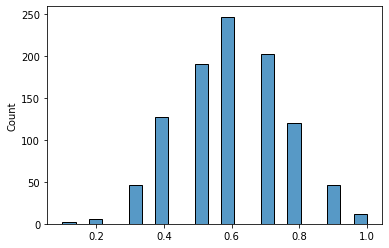

In [7]:
sns.histplot(p_hats)

## 표준정규분포를 가정한 신뢰구간

In [20]:
# 표준오차
s = p_hats.std()
z = norm.ppf([0.025, 0.975])
z

array([-1.95996398,  1.95996398])

In [21]:
p_hat + (z * s)

array([0.28715045, 0.91284955])

### (짝퉁) 표본분포를 활용한 신뢰구간

#### 일반 백분위 활용

In [10]:
np.percentile(p_hats, (2.5, 97.5))

array([0.3, 0.9])

하지만 위 방법은, 표본분포가 추정치를 기준으로 대칭이 아닐 경우 (이론적으로) 편향된 결과를 계산. 

보다 정확한 신뢰구간 추정을 위해서는 백분위를 추정치 기준으로 _표준화_ 해야함.

$2.5$ 백분위(percentile)를 $z_{2.5}$라고 한다면, 우리가 알고 싶은 것은

$z_{2.5} \le \hat{p} - p \le z_{97.5}$

즉, 우리가 계산하고자 하는 것은

$ \hat{p} -z_{97.5} \le p \le \hat{p} - z_{2.5}$

In [22]:
# 표준화된 백분위 (percentile)
percentiles = np.percentile(p_hats, (2.5, 97.5)) - p_hat
percentiles

array([-0.3,  0.3])

In [23]:
p_hat - percentiles

array([0.9, 0.3])